<a href="https://colab.research.google.com/github/veabanga/Capstone/blob/master/LayoutColumnCounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!sudo apt-get install poppler-utils #pdf2image dependency -- restart runtime/kernel after installation
!sudo apt-get install tesseract-ocr-eng #install Tesseract OCR Engine --restart runtime/kernel after installatio

In [ ]:
%%capture
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip install pdf2img
!pip install "layoutparser[ocr]"

In [ ]:
!pip install torchvision

In [ ]:
!pip install sahi
!pip install yolov5

In [ ]:
!pip install fastcore -U

In [ ]:
!pip install Pillow --upgrade

In [ ]:
import pdf2image
import numpy as np
import layoutparser as lp
import torchvision.ops.boxes as bops
import torch

In [ ]:
pdf_file= '/content/test2col.pdf' # Adjust the filepath of your input image accordingly
img = np.asarray(pdf2image.convert_from_path(pdf_file)[0])

In [ ]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

layout_result = model.detect(img)

lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)
text_blocks = lp.Layout([b for b in layout_result if b.type=='Text'])

lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [ ]:
lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)

In [ ]:
!pip install pdfminer.six

In [ ]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [ ]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/2, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [ ]:
for block in text_blocks:

    # Crop image around the detected layout
    segment_image = (block
                       .pad(left=15, right=15, top=5, bottom=5)
                       .crop_image(img))

    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

In [ ]:
for txt in text_blocks:
    print(txt.text, end='\n---\n')


In this chapter of document, the hardware

---
aspect of the project will be discussed.
Interfacing Roomba, TelosB and Bluetooth
module cannot be done directly, since the
voltage levels are very different both for
supply voltage and serial communication
logic levels.

---
Interfacing Roomba, TelosB and Bluetooth

---
module cannot be done directly, since the

---
voltage levels are very different both for

---
2.1.1. Interfacing Devices

---
2.1.4. interiacing vevices

To build the required WSN of this project,
there are a number of different devices and
components that should work together
despite the difference they may have in
terms of voltage level both for operation or
communication logic Jevels. For example,
TelesB's UART is operating in 3.3V TTL?
logic, while the Bluetooth moduleis using 5
Volt TTL.

---
components that should work together

---
Also, for debugging purposes, 3 direct RS-
232 communication line has been made to
enable quicktest and debugging. Since this
l

In [ ]:
pdf_file_2= '/content/test2col.pdf' # Adjust the filepath of your input image accordingly
img_2 = np.asarray(pdf2image.convert_from_path(pdf_file)[0])
layout_result_2 = model.detect(img_2)

text_blocks_2 = lp.Layout([b for b in layout_result_2 if b.type=='Text'])

lp.draw_box(img_2, text_blocks_2,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

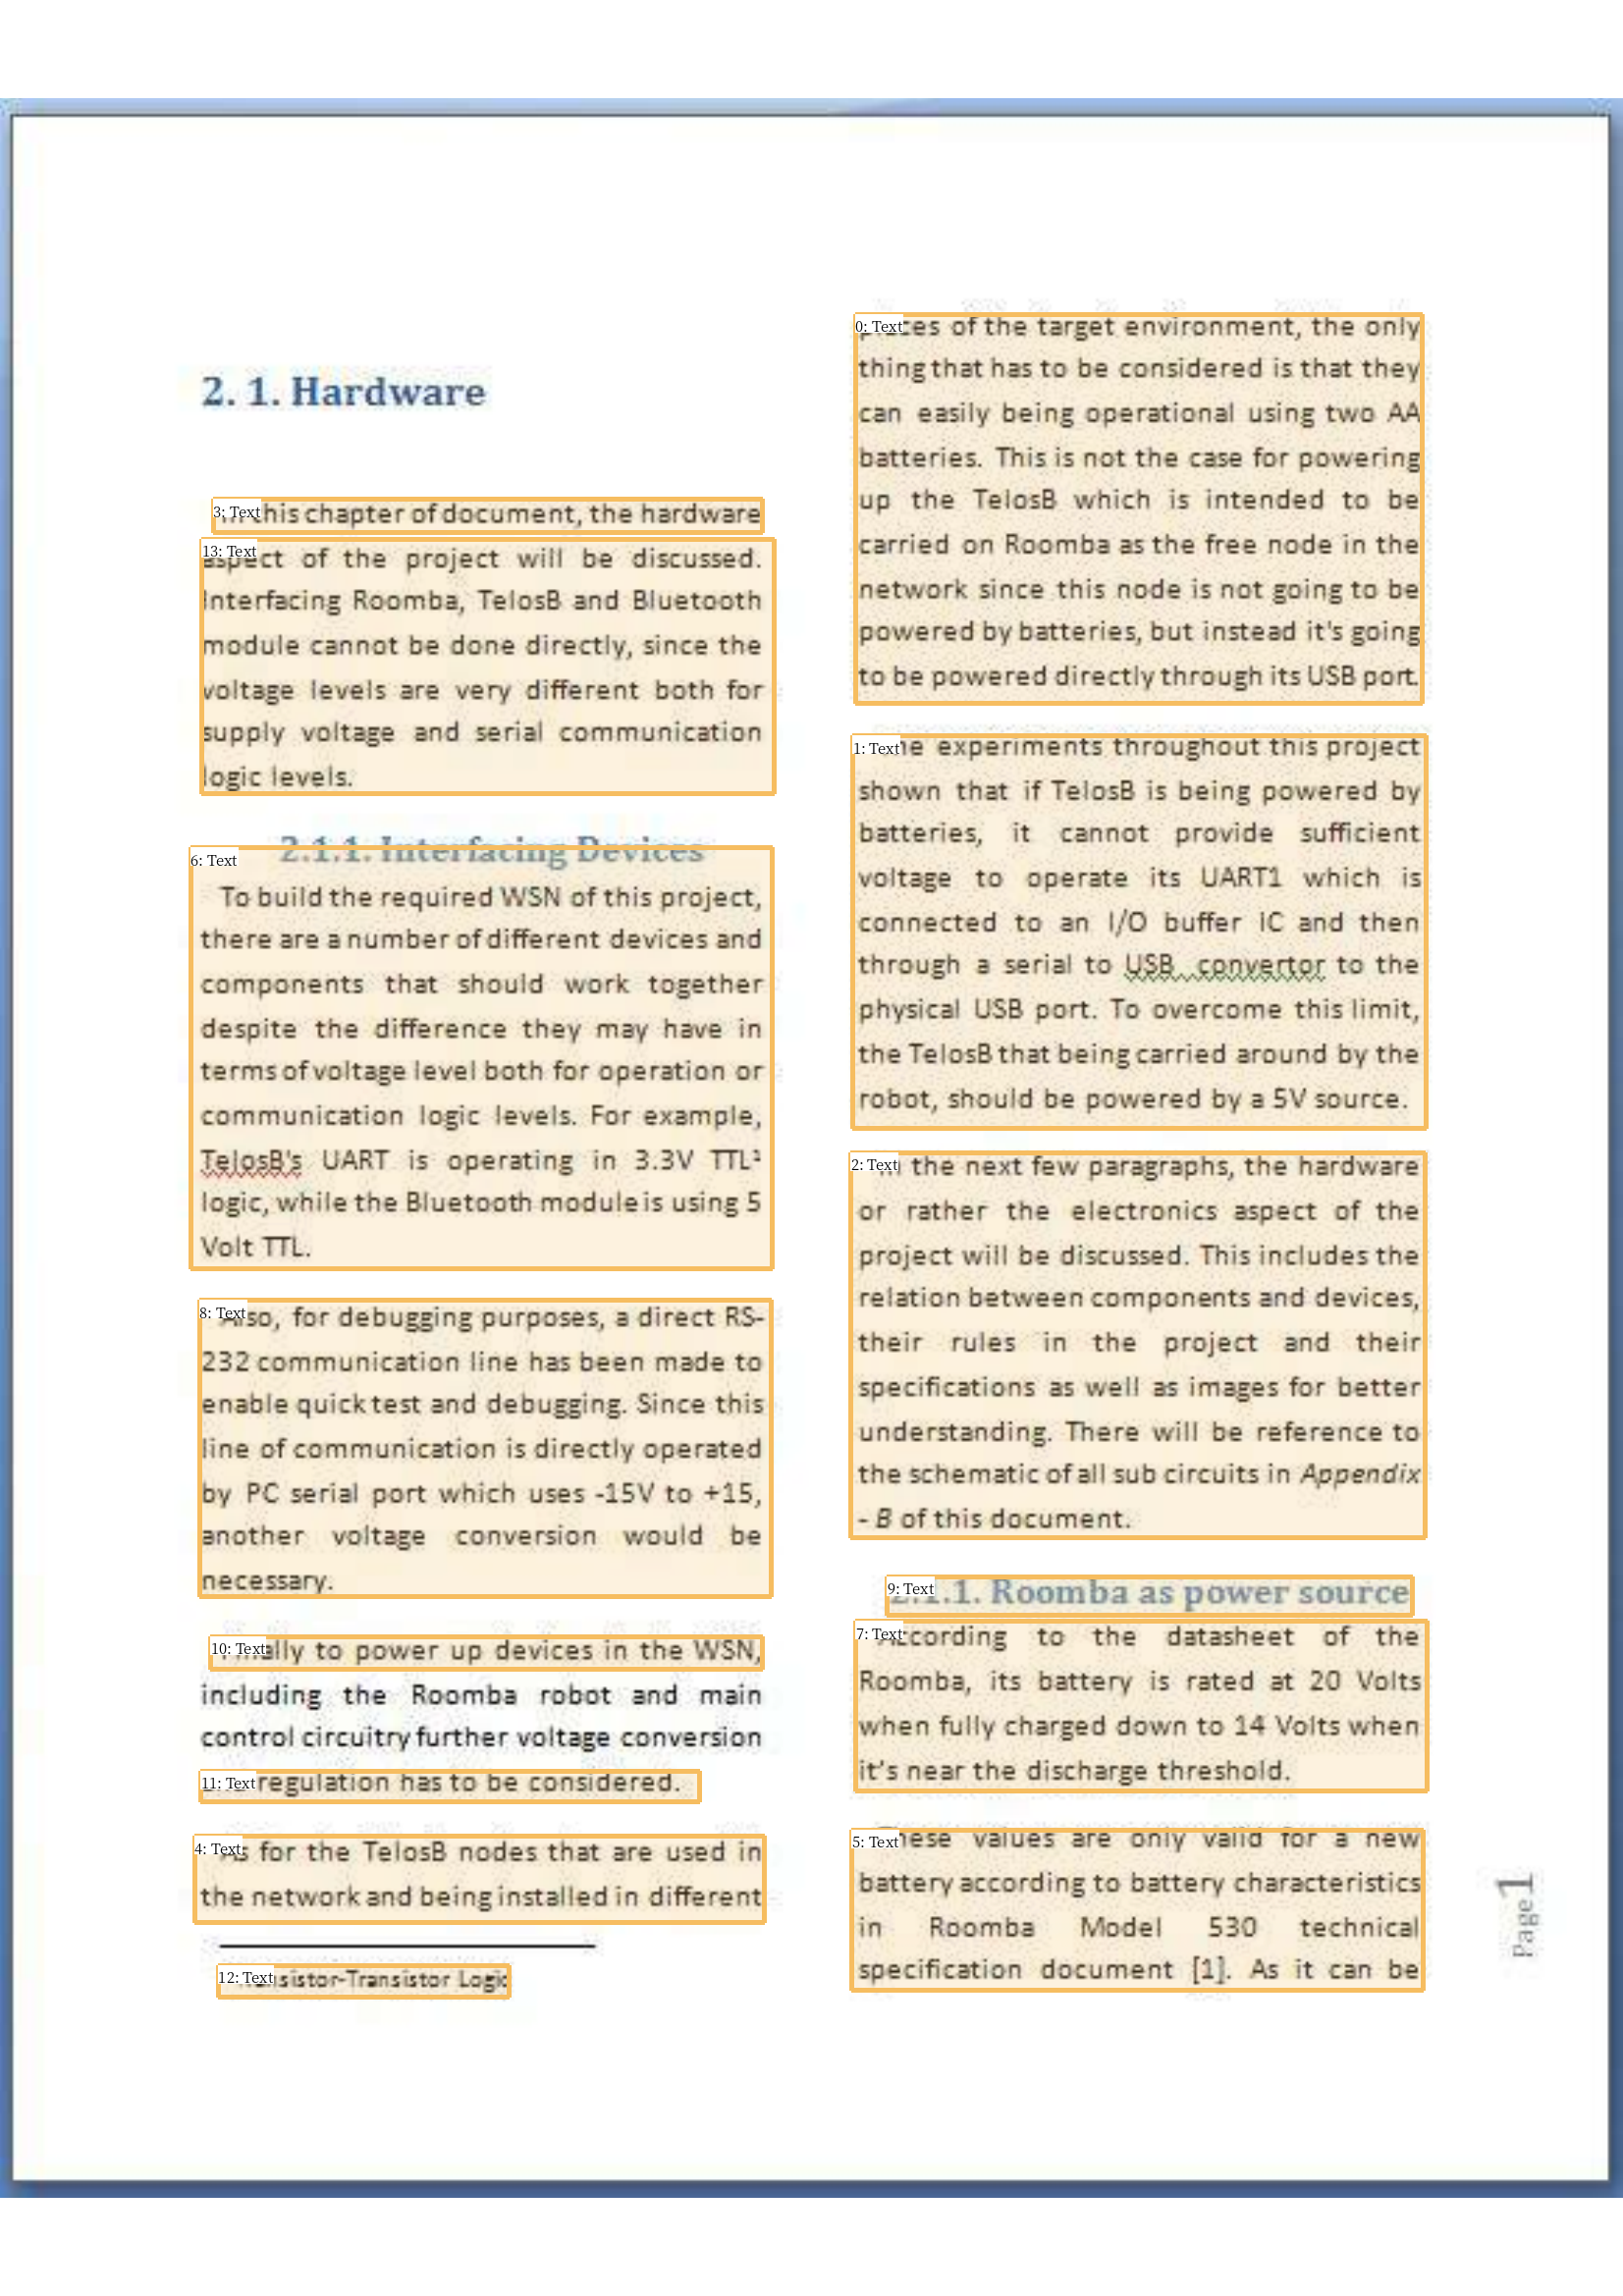

In [ ]:
def set_coordinate(data):

  x1 = data.block.x_1
  y1 = data.block.y_1
  x2 = data.block.x_2
  y2 = data.block.y_2

  return torch.tensor([[x1, y1, x2, y2]], dtype=torch.float)

def compute_iou(box_1, box_2):

  return bops.box_iou(box_1, box_2)

def compute_area(box):

    width = box.tolist()[0][2] - box.tolist()[0][0]
    length = box.tolist()[0][3] - box.tolist()[0][1]
    area = width*length

    return area
def refine(block_1, block_2):

  bb1 = set_coordinate(block_1)
  bb2 = set_coordinate(block_2)

  iou = compute_iou(bb1, bb2)

  if iou.tolist()[0][0] != 0:

    a1 = compute_area(bb1)
    a2 = compute_area(bb2)

    block_2.set(type='None', inplace= True) if a1 > a2 else block_1.set(type='None', inplace= True)


for layout_i in text_blocks_2:

    for layout_j in text_blocks_2:

        if layout_i != layout_j:

            refine(layout_i, layout_j)

text_blocks_2 = lp.Layout([b for b in text_blocks_2 if b.type=='Text'])

lp.draw_box(img_2, text_blocks_2,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [ ]:
print(text_blocks_2)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=104.57835388183594, y_1=461.7864990234375, x_2=668.8253784179688, y_2=825.6487426757812), text=None, id=None, type=Text, parent=None, next=None, score=0.9998692274093628), TextBlock(block=Rectangle(x_1=702.161376953125, y_1=278.0694580078125, x_2=1263.7816162109375, y_2=428.3046875), text=None, id=None, type=Text, parent=None, next=None, score=0.9996346235275269), TextBlock(block=Rectangle(x_1=1304.0435791015625, y_1=638.4493408203125, x_2=1871.27099609375, y_2=1029.1375732421875), text=None, id=None, type=Text, parent=None, next=None, score=0.9996170997619629), TextBlock(block=Rectangle(x_1=702.877197265625, y_1=578.1824951171875, x_2=1267.879150390625, y_2=729.95556640625), text=None, id=None, type=Text, parent=None, next=None, score=0.9990967512130737), TextBlock(block=Rectangle(x_1=703.9129028320312, y_1=732.6250610351562, x_2=1265.6893310546875, y_2=881.3414916992188), text=None, id=None, type=Text, parent=None, next=None, score=0.9981

In [ ]:
# cols = 0

#     width = text_block.block.x_1
#     if text_block.block.x_1 - width > 20:
#         cols = cols + 1
#         width = width

sorted_blocks = sorted(text_blocks_2._blocks, key=lambda block: block.block.x_1)
# print(sorted_blocks)
col = 1
regular_change = None

for i, text_block in enumerate(sorted_blocks):
      x1_val = text_block.block.x_1
      if i == 0:
          regular_change = x1_val
      else:
          change = abs(x1_val - prev_x1_val)
          if change > 0.8 * regular_change:
              col += 1
              regular_change = change
      prev_x1_val = x1_val

print("Number of columns are: ",col)


Number of columns are:  2
